In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv', sep = ',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Условие 1:
*Задача 1***

Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы.

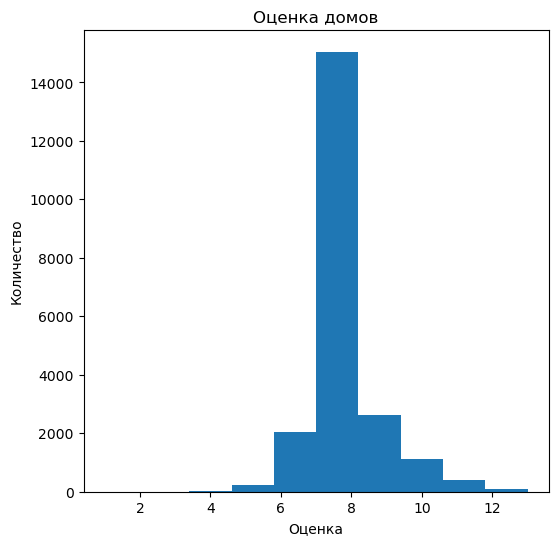

In [3]:
plt.figure(figsize = (6, 6))
plt.hist(df['grade'], bins = 10)
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('Оценка домов')
plt.show();

**Вывод:** Глядя на график, можно сделать вывод о том, что большинство домов имеет оценку от 6 до 9 баллов, оценка 7-8 самая частотная

***1.2*** Изучите стоимости недвижимости

***1.3*** Изучите распределение квадратуры жилой

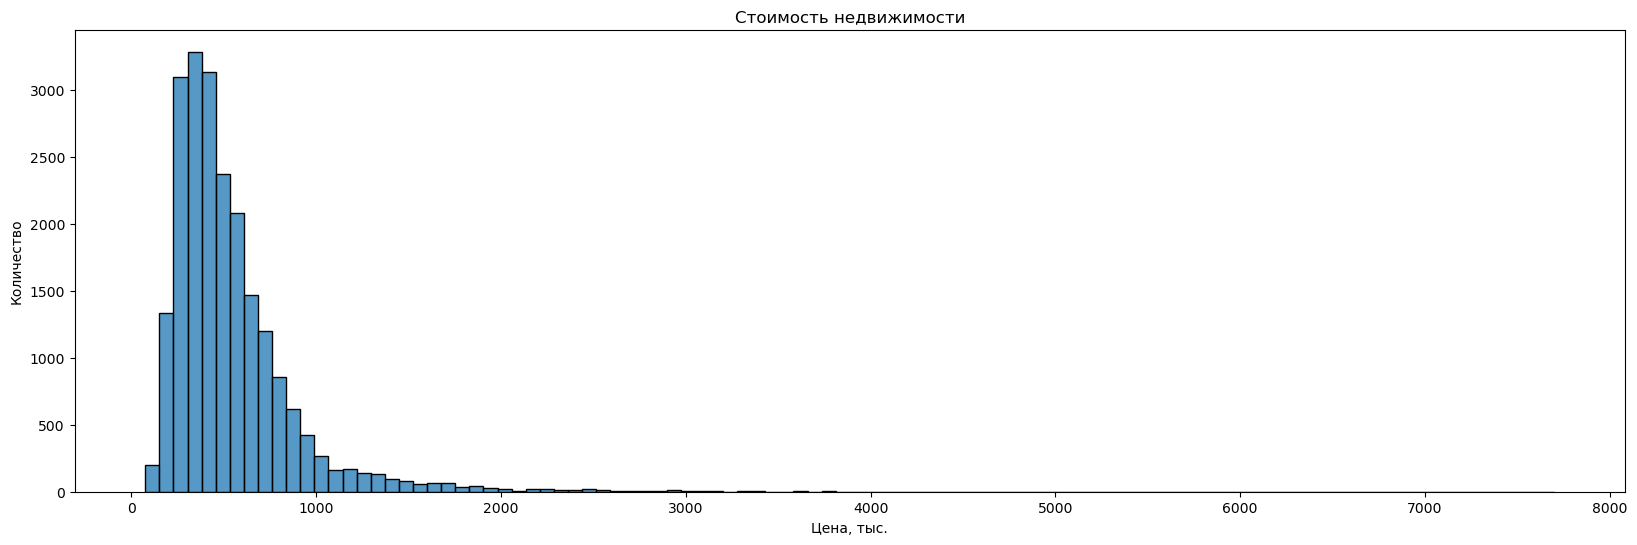

In [4]:
plt.figure(figsize = (20, 6))
sns.histplot(df['price'].apply(lambda x: x/1000), bins = 100)
plt.xlabel('Цена, тыс.')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости')
plt.show();

**Вывод:** Большая часть домов стоит до 1000000

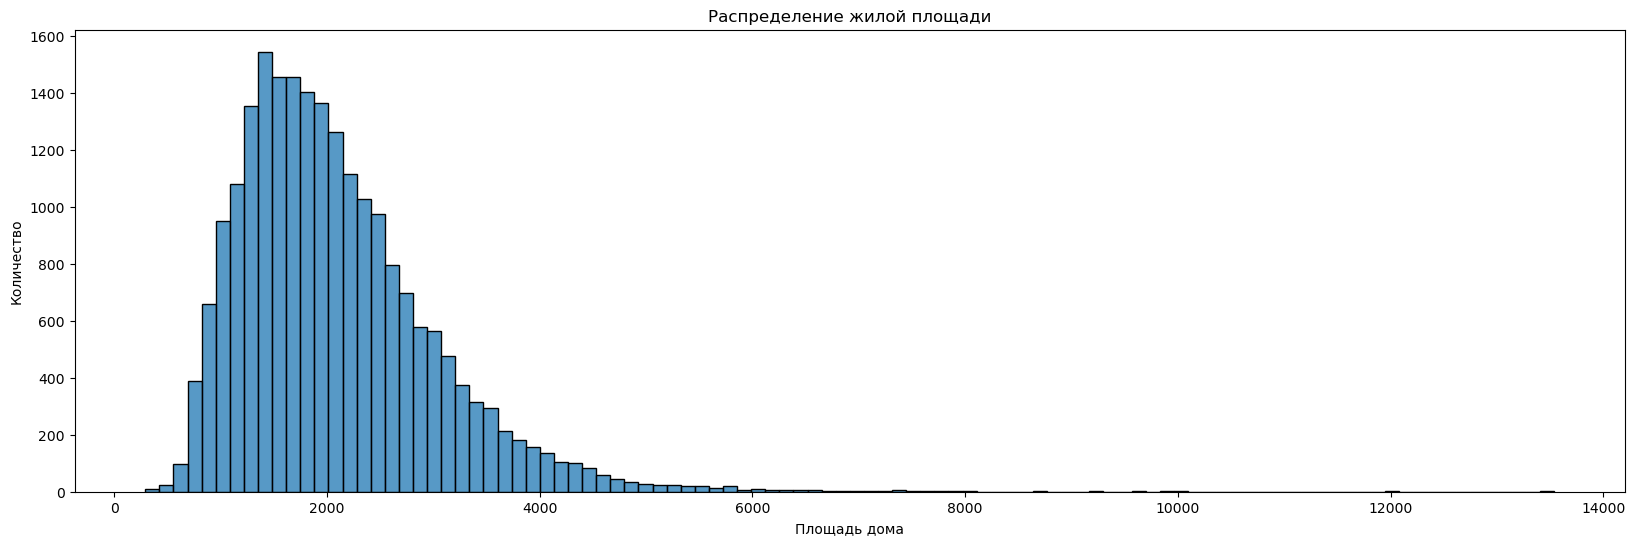

In [5]:
plt.figure(figsize = (20, 6))
sns.histplot(df['sqft_living'], bins = 100)
plt.xlabel('Площадь дома')
plt.ylabel('Количество')
plt.title('Распределение жилой площади')
plt.show();

**Вывод:** большинство домов имеет жилую площадь от 1000 кв.м. до 3000 кв.м.

**Условие 2: *2 задача***

2.1 Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

2.2 Изучите распределение этажей домов.

2.2 Изучите распределение состояния домов.

In [6]:
df_waterfront = df.waterfront. value_counts()
df_waterfront

0    21450
1      163
Name: waterfront, dtype: int64

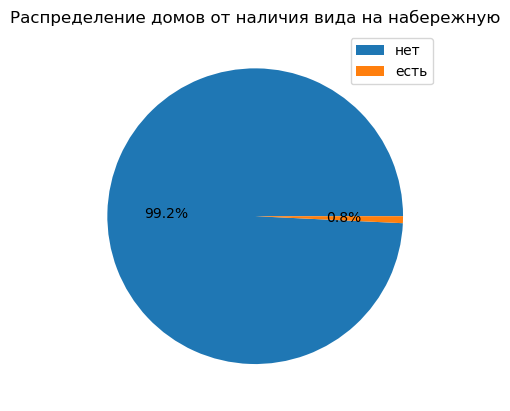

In [32]:
plt.pie(df_waterfront, autopct= '%1.1f%%')
plt.legend(['нет', 'есть'])
plt.title('Распределение домов от наличия вида на набережную');

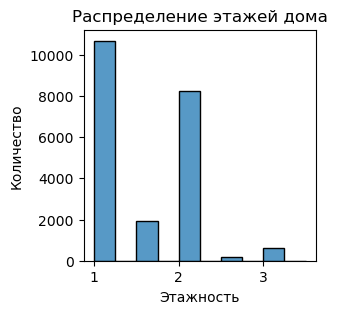

In [17]:
plt.figure(figsize = (3, 3))
sns.histplot(df['floors'], bins = 10)
plt.xlabel('Этажность')
plt.ylabel('Количество')
plt.title('Распределение этажей дома')
plt.show();

**Вывод:** Больше всего одноэтажных и двухэтажных домов

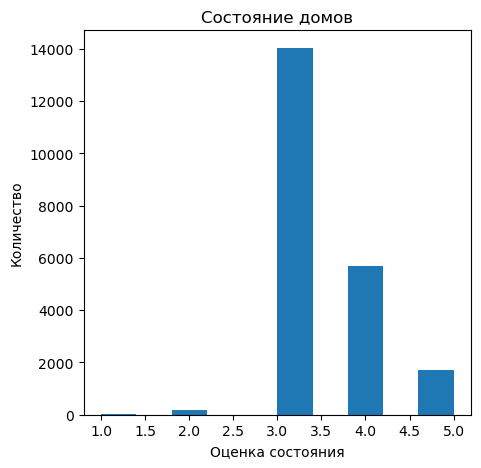

In [18]:
plt.figure(figsize = (5, 5))
plt.hist(df['condition'])
plt.xlabel('Оценка состояния')
plt.ylabel('Количество')
plt.title('Состояние домов')
plt.show();

**Вывод:** Большинство домов имеет оценку 3 и выше. Самая частотная оценка - 3

**Условие 3: *3 задача***
    
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [11]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix['price']

id               0.0
price            1.0
bedrooms         0.3
bathrooms        0.5
sqft_living      0.7
sqft_lot         0.0
floors           0.3
waterfront       0.3
view             0.4
condition        0.0
grade            0.7
sqft_above       0.6
sqft_basement    0.3
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.3
long             0.0
sqft_living15    0.6
sqft_lot15       0.0
Name: price, dtype: float64

Мы видим, что цена зависит от жилой площади, оценки дома, количества ванных комнат, площади дома, которые находятся выше земли, а также количества жилой площади у 15 соседей

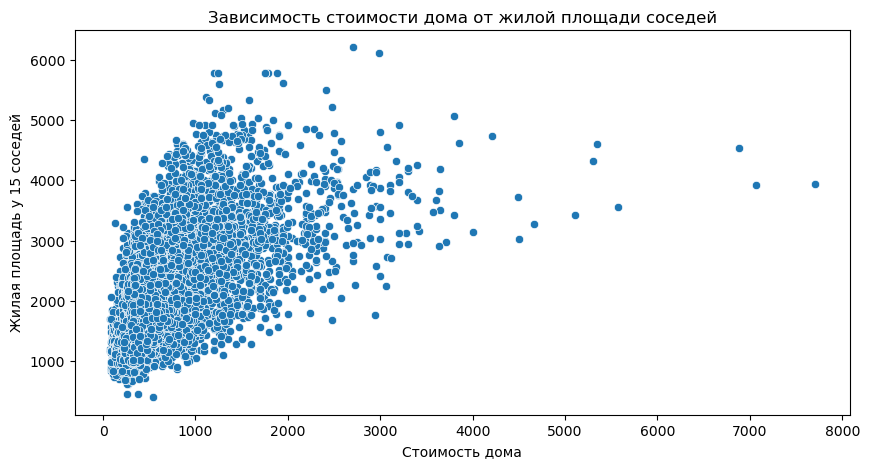

In [12]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = df['price'].apply(lambda x: x/1000), y = df['sqft_living15'])
plt.xlabel('Стоимость дома')
plt.ylabel('Жилая площадь у 15 соседей')
plt.title('Зависимость стоимости дома от жилой площади соседей')
plt.show();

***Вывод:*** мы видим линейную зависимость - чем больше площадь жилья у соседей, тем выше стоимость дома.

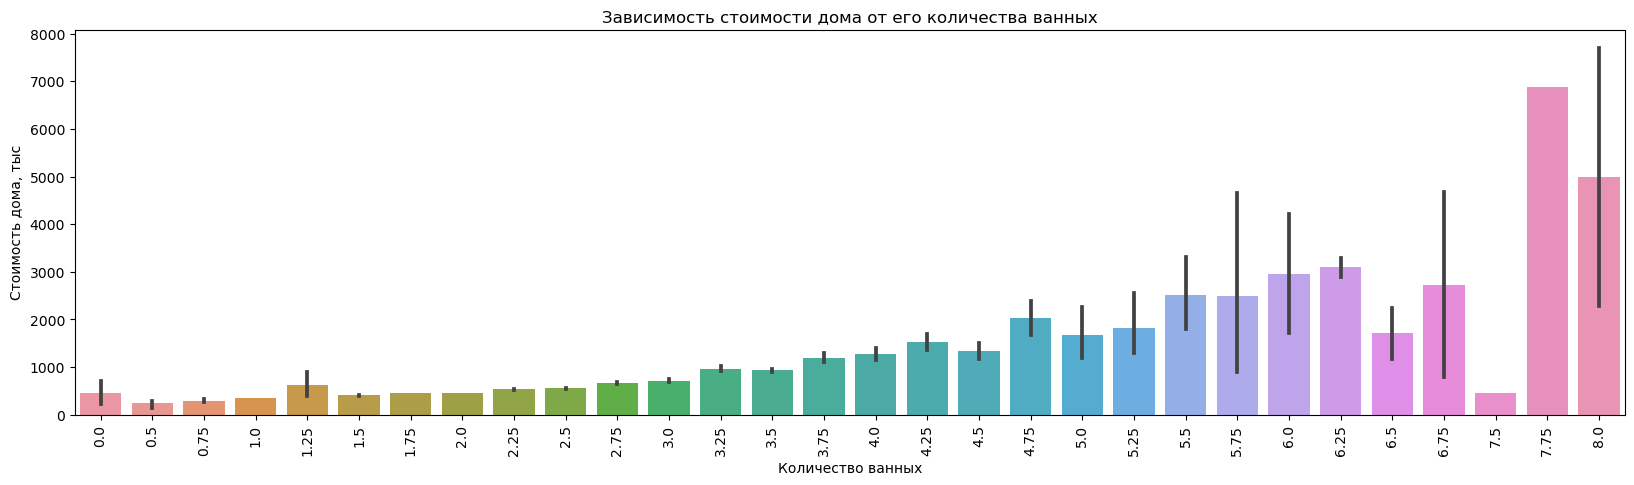

In [35]:
plt.figure(figsize = (20,5))
sns.barplot(x = df['bathrooms'], y = df['price'].apply(lambda x: x/1000))
plt.xlabel('Количество ванных')
plt.ylabel('Стоимость дома, тыс')
plt.title('Зависимость стоимости дома от его количества ванных')
plt.xticks(rotation = 90)
plt.show();

***Вывод:*** Здесь также прослеживается звисимость стоимости дома от количества ванных комнат в нем.

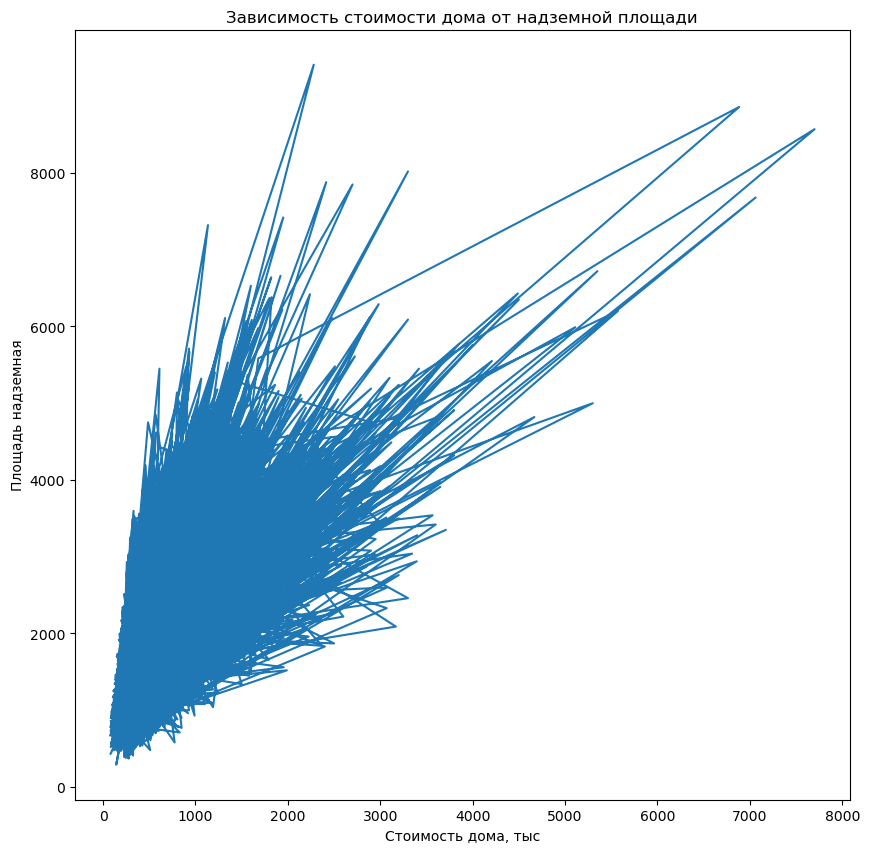

In [40]:
plt.figure(figsize = (10,10))
plt.plot(df['price'].apply(lambda x: x/1000),df['sqft_above'])
plt.ylabel('Площадь надземная')
plt.xlabel('Стоимость дома, тыс')
plt.title('Зависимость стоимости дома от надземной площади')
plt.show();

***Вывод:*** Чем больше площадь постройки находится над землей, тем выше стоимость дома

<Figure size 1000x1000 with 0 Axes>

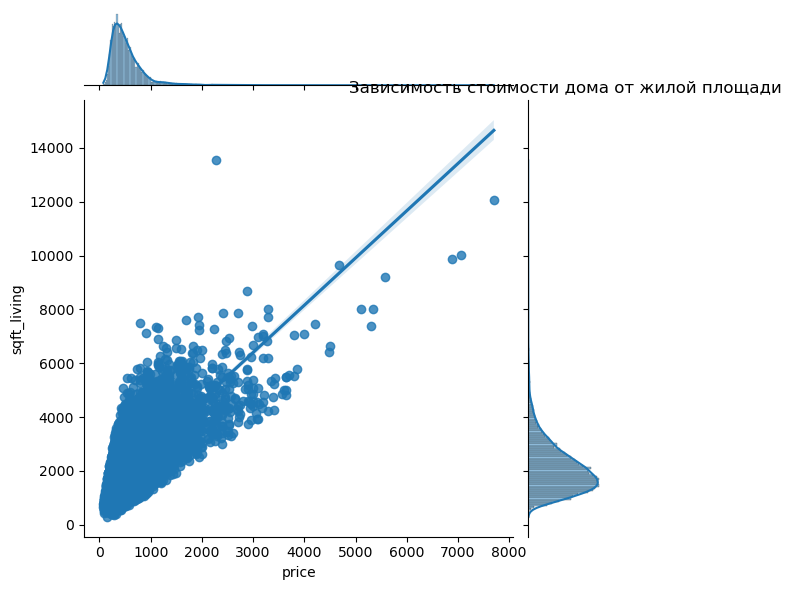

In [37]:
plt.figure(figsize = (10, 10))
sns.jointplot(x=df['price'].apply(lambda x: x/1000), y=df['sqft_living'], kind='reg')
plt.ylabel('Жилая площадь дома')
plt.xlabel('Стоимость дома, тыс')
plt.title('Зависимость стоимости дома от жилой площади')
plt.show();

***Вывод:*** На этом графике видна прямая линейная связь между жилой площадью и стоимостью дома

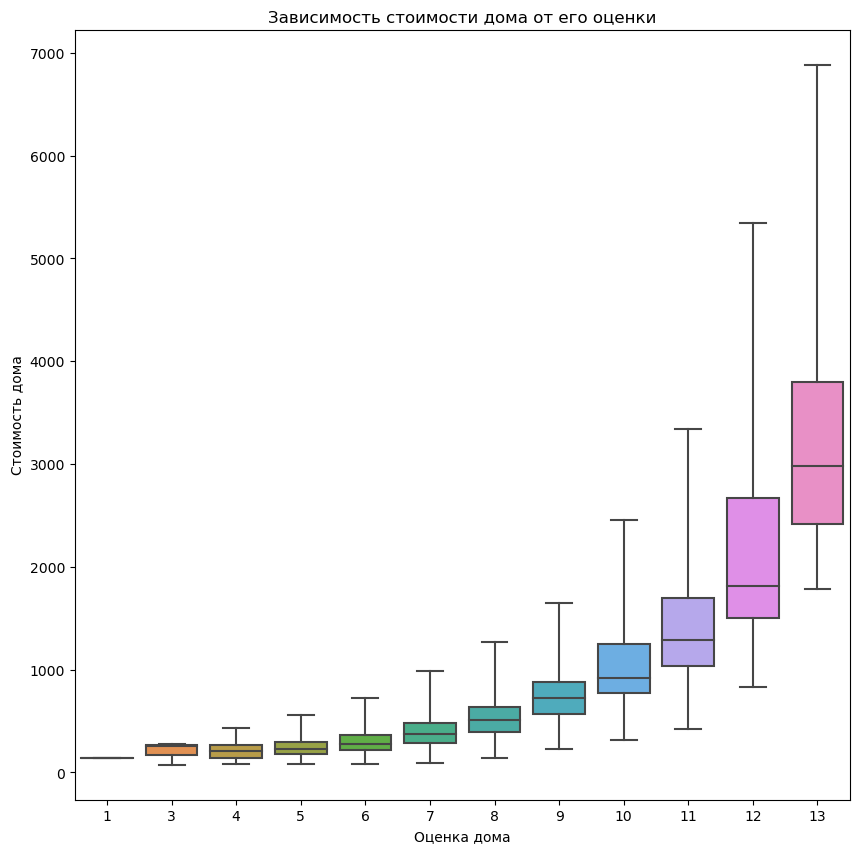

In [31]:
plt.figure(figsize = (10,10))
sns.boxplot(x = df['grade'], y = df['price'].apply(lambda x: x/1000), whis = 2.5, showfliers = False)
plt.xlabel('Оценка дома')
plt.ylabel('Стоимость дома')
plt.title('Зависимость стоимости дома от его оценки')
plt.show();

***Вывод:*** Чем выше оценка дома, тем выше стоимость

Общий вывод: Все вышепредставленные графики помогают увидеть прямую зависимость стоимости дома от таких параметров, как жилая площадь, в том числе надземная и соседская, оценка дома, количество ванных комнат.